# NN
## domain 2

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import json
import numpy as np

In [2]:
text = []
label = []

with open("../../data/domain2_train.json") as f:
    for line in f:
        # read line by line
        data = json.loads(line)
        
        # add values
        text.append(data["text"])
        label.append(data["label"])


In [3]:
vector_sample = np.arange(5000)
from sklearn.feature_extraction.text import CountVectorizer

def toStr(n):
   return str(n)

# Create a Vectorizer Object
vectorizer = CountVectorizer(preprocessor= toStr, analyzer="word", token_pattern=r"(?u)\b\w+\b")

vectorizer.fit(vector_sample)

# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)

# Encode the Document
vector = vectorizer.transform(text)

# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())


Vocabulary:  {'0': 0, '1': 1, '2': 1112, '3': 2223, '4': 3334, '5': 4445, '6': 4556, '7': 4667, '8': 4778, '9': 4889, '10': 2, '11': 113, '12': 224, '13': 335, '14': 446, '15': 557, '16': 668, '17': 779, '18': 890, '19': 1001, '20': 1113, '21': 1224, '22': 1335, '23': 1446, '24': 1557, '25': 1668, '26': 1779, '27': 1890, '28': 2001, '29': 2112, '30': 2224, '31': 2335, '32': 2446, '33': 2557, '34': 2668, '35': 2779, '36': 2890, '37': 3001, '38': 3112, '39': 3223, '40': 3335, '41': 3446, '42': 3557, '43': 3668, '44': 3779, '45': 3890, '46': 4001, '47': 4112, '48': 4223, '49': 4334, '50': 4446, '51': 4457, '52': 4468, '53': 4479, '54': 4490, '55': 4501, '56': 4512, '57': 4523, '58': 4534, '59': 4545, '60': 4557, '61': 4568, '62': 4579, '63': 4590, '64': 4601, '65': 4612, '66': 4623, '67': 4634, '68': 4645, '69': 4656, '70': 4668, '71': 4679, '72': 4690, '73': 4701, '74': 4712, '75': 4723, '76': 4734, '77': 4745, '78': 4756, '79': 4767, '80': 4779, '81': 4790, '82': 4801, '83': 4812, '84':

In [4]:
X = vector.toarray()
y = np.array(label).ravel()

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (14900, 5000)
Shape of y: (14900,)


## Data splitting

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Building NN

In [6]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [7]:

# Define the Neural Network
class TextClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TextClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.dropout = nn.Dropout(0.5)
        self.fc3 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.dropout(out)
        out = self.fc3(out)
        return out

# Assuming your data is loaded into X_train, y_train, X_test, y_test
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Hyperparameters
input_size = 5000
hidden_size = 100
num_classes = 2
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# Create an instance of the classifier and define loss and optimizer
model = TextClassifier(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train_tensor[i:i+batch_size]
        y_batch = y_train_tensor[i:i+batch_size]
        
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(X_train)//batch_size}], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)
    print(f'Accuracy of the model on test data: {accuracy * 100:.2f}%')


Epoch [1/10], Step [1/119], Loss: 0.6882
Epoch [1/10], Step [101/119], Loss: 0.6265
Epoch [1/10], Step [201/119], Loss: 0.5535
Epoch [1/10], Step [301/119], Loss: 0.6742
Epoch [1/10], Step [401/119], Loss: 0.5512
Epoch [1/10], Step [501/119], Loss: 0.4626
Epoch [1/10], Step [601/119], Loss: 0.6897
Epoch [1/10], Step [701/119], Loss: 0.4012
Epoch [1/10], Step [801/119], Loss: 0.4517
Epoch [1/10], Step [901/119], Loss: 0.6092
Epoch [1/10], Step [1001/119], Loss: 0.4886
Epoch [1/10], Step [1101/119], Loss: 0.4655
Epoch [1/10], Step [1201/119], Loss: 0.4427
Epoch [1/10], Step [1301/119], Loss: 0.4984
Epoch [1/10], Step [1401/119], Loss: 0.5647
Epoch [1/10], Step [1501/119], Loss: 0.4409
Epoch [1/10], Step [1601/119], Loss: 0.3672
Epoch [1/10], Step [1701/119], Loss: 0.4381
Epoch [1/10], Step [1801/119], Loss: 0.4583
Epoch [1/10], Step [1901/119], Loss: 0.4794
Epoch [1/10], Step [2001/119], Loss: 0.4815
Epoch [1/10], Step [2101/119], Loss: 0.3732
Epoch [1/10], Step [2201/119], Loss: 0.3386


### K-fold validation

In [8]:

# Define the Neural Network
class TextClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TextClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.dropout = nn.Dropout(0.5)
        self.fc3 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.dropout(out)
        out = self.fc3(out)
        return out

Epoch [1/10], Step [1/119], Loss: 0.7240
Epoch [1/10], Step [101/119], Loss: 0.5781
Epoch [1/10], Step [201/119], Loss: 0.4704
Epoch [1/10], Step [301/119], Loss: 0.3934
Epoch [1/10], Step [401/119], Loss: 0.2852
Epoch [1/10], Step [501/119], Loss: 0.2266
Epoch [1/10], Step [601/119], Loss: 0.1682
Epoch [1/10], Step [701/119], Loss: 0.1174
Epoch [1/10], Step [801/119], Loss: 0.0954
Epoch [1/10], Step [901/119], Loss: 0.0745
Epoch [1/10], Step [1001/119], Loss: 0.0565
Epoch [1/10], Step [1101/119], Loss: 0.0273
Epoch [1/10], Step [1201/119], Loss: 0.0195
Epoch [1/10], Step [1301/119], Loss: 0.0130
Epoch [1/10], Step [1401/119], Loss: 0.0137
Epoch [1/10], Step [1501/119], Loss: 0.0081
Epoch [1/10], Step [1601/119], Loss: 0.0081
Epoch [1/10], Step [1701/119], Loss: 0.0056
Epoch [1/10], Step [1801/119], Loss: 0.0040
Epoch [1/10], Step [1901/119], Loss: 0.0027
Epoch [1/10], Step [2001/119], Loss: 0.0024
Epoch [1/10], Step [2101/119], Loss: 0.0023
Epoch [1/10], Step [2201/119], Loss: 0.0014


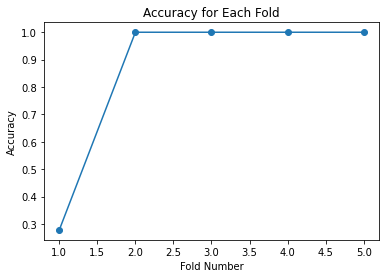

In [9]:
# Assuming your data is loaded into X_train, y_train, X_test, y_test
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


# Hyperparameters
input_size = 5000
hidden_size = 100
num_classes = 2
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# Define KFold Cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits)
accuracies = []

for train_idx, val_idx in kf.split(X):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val, dtype=torch.long)
    
    # Create an instance of the classifier and define loss and optimizer
    model = TextClassifier(input_size, hidden_size, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    for epoch in range(num_epochs):
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train_tensor[i:i+batch_size]
            y_batch = y_train_tensor[i:i+batch_size]

            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(X_train)//batch_size}], Loss: {loss.item():.4f}')

    # Evaluate the model
    with torch.no_grad():
        outputs = model(X_val_tensor)
        _, predicted = torch.max(outputs.data, 1)
        accuracy = (predicted == y_val_tensor).sum().item() / len(y_val_tensor)
        accuracies.append(accuracy)


# Plotting the accuracies
plt.plot(range(1, n_splits + 1), accuracies, marker='o')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Fold')
plt.show()


In [10]:
accuracies

[0.2785234899328859, 1.0, 1.0, 1.0, 1.0]

In [11]:
save_path = "model_4th_fold_domain2.pth"

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    
    # Split the data
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val, dtype=torch.long)
    
    # Create an instance of the classifier and define loss and optimizer
    model = TextClassifier(input_size, hidden_size, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    for epoch in range(num_epochs):
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train_tensor[i:i+batch_size]
            y_batch = y_train_tensor[i:i+batch_size]

            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(X_train)//batch_size}], Loss: {loss.item():.4f}')

    # Evaluate the model
    with torch.no_grad():
        outputs = model(X_val_tensor)
        _, predicted = torch.max(outputs.data, 1)
        accuracy = (predicted == y_val_tensor).sum().item() / len(y_val_tensor)
        accuracies.append(accuracy)

    # Save the model after training on the 4th fold
    if fold == 3:  # 0-indexed, so 3 means 4th fold
        torch.save(model.state_dict(), save_path)

# Continue with plotting the accuracies or any other tasks you want to perform after training on all folds.


Epoch [1/10], Step [1/119], Loss: 0.6633
Epoch [1/10], Step [101/119], Loss: 0.5168
Epoch [1/10], Step [201/119], Loss: 0.4063
Epoch [1/10], Step [301/119], Loss: 0.3432
Epoch [1/10], Step [401/119], Loss: 0.2535
Epoch [1/10], Step [501/119], Loss: 0.2021
Epoch [1/10], Step [601/119], Loss: 0.1388
Epoch [1/10], Step [701/119], Loss: 0.1007
Epoch [1/10], Step [801/119], Loss: 0.0810
Epoch [1/10], Step [901/119], Loss: 0.0638
Epoch [1/10], Step [1001/119], Loss: 0.0511
Epoch [1/10], Step [1101/119], Loss: 0.0272
Epoch [1/10], Step [1201/119], Loss: 0.0169
Epoch [1/10], Step [1301/119], Loss: 0.0099
Epoch [1/10], Step [1401/119], Loss: 0.0141
Epoch [1/10], Step [1501/119], Loss: 0.0066
Epoch [1/10], Step [1601/119], Loss: 0.0086
Epoch [1/10], Step [1701/119], Loss: 0.0048
Epoch [1/10], Step [1801/119], Loss: 0.0030
Epoch [1/10], Step [1901/119], Loss: 0.0029
Epoch [1/10], Step [2001/119], Loss: 0.0020
Epoch [1/10], Step [2101/119], Loss: 0.0032
Epoch [1/10], Step [2201/119], Loss: 0.0012


### Predict domian2

In [12]:
# Instantiate the model
loaded_model = TextClassifier(input_size, hidden_size, num_classes)

# Load the saved weights
loaded_model.load_state_dict(torch.load(save_path))

# Set the model to evaluation mode
loaded_model.eval()

# Make predictions
with torch.no_grad():
    test_tensor = torch.tensor(X_test, dtype=torch.float32)  # Assuming you've got your test data in X_test
    outputs = loaded_model(test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    # Now `predicted` contains the predicted labels for the test set


In [13]:
text = []
label = []

with open("../../data/test_set.json") as f:
    for line in f:
        # read line by line
        data = json.loads(line)
        
        # add values
        text.append(data["text"])
        #label.append(data["label"])
vector_sample = np.arange(5000)

def toStr(n):
   return str(n)

# Create a Vectorizer Object
vectorizer = CountVectorizer(preprocessor= toStr, analyzer="word", token_pattern=r"(?u)\b\w+\b")

vectorizer.fit(vector_sample)

# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)

# Encode the Document
vector = vectorizer.transform(text)

# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())

X_predict = vector.toarray()
y_predict = np.array(label).ravel()

print("Shape of X:", X_predict.shape)
print("Shape of y:", y_predict.shape)

Vocabulary:  {'0': 0, '1': 1, '2': 1112, '3': 2223, '4': 3334, '5': 4445, '6': 4556, '7': 4667, '8': 4778, '9': 4889, '10': 2, '11': 113, '12': 224, '13': 335, '14': 446, '15': 557, '16': 668, '17': 779, '18': 890, '19': 1001, '20': 1113, '21': 1224, '22': 1335, '23': 1446, '24': 1557, '25': 1668, '26': 1779, '27': 1890, '28': 2001, '29': 2112, '30': 2224, '31': 2335, '32': 2446, '33': 2557, '34': 2668, '35': 2779, '36': 2890, '37': 3001, '38': 3112, '39': 3223, '40': 3335, '41': 3446, '42': 3557, '43': 3668, '44': 3779, '45': 3890, '46': 4001, '47': 4112, '48': 4223, '49': 4334, '50': 4446, '51': 4457, '52': 4468, '53': 4479, '54': 4490, '55': 4501, '56': 4512, '57': 4523, '58': 4534, '59': 4545, '60': 4557, '61': 4568, '62': 4579, '63': 4590, '64': 4601, '65': 4612, '66': 4623, '67': 4634, '68': 4645, '69': 4656, '70': 4668, '71': 4679, '72': 4690, '73': 4701, '74': 4712, '75': 4723, '76': 4734, '77': 4745, '78': 4756, '79': 4767, '80': 4779, '81': 4790, '82': 4801, '83': 4812, '84':

In [14]:
X_predict

array([[32, 14,  3, ...,  0,  0,  0],
       [ 2, 11,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 7,  1,  0, ...,  0,  0,  0],
       [27, 18,  6, ...,  0,  0,  0]])

In [15]:
# Instantiate the model
loaded_model = TextClassifier(input_size, hidden_size, num_classes)

# Load the saved weights
loaded_model.load_state_dict(torch.load(save_path))

# Set the model to evaluation mode
loaded_model.eval()

# Make predictions
with torch.no_grad():
    test_tensor = torch.tensor(X_predict, dtype=torch.float32)  # Assuming you've got your test data in X_test
    outputs = loaded_model(test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    # Now `predicted` contains the predicted labels for the test set


In [16]:
import csv

# Your tensor
tensor_data = predicted  # Fill in with your tensor data

# Convert tensor to list
data_list = tensor_data.tolist()

# Write to CSV
with open('result_NN_domain2.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["id", "class"])
    for idx, value in enumerate(data_list):
        writer.writerow([idx, value])


### Feedback:
1. domain 2 is imbalanced and need more preprocessing (sampling etc.)

## Optimisation
### Strategy


1. **Resampling:** Consider using techniques like oversampling the minority class, undersampling the majority class, or using Synthetic Minority Over-sampling Technique (SMOTE) to balance the dataset.

2. **Different Metrics:** Evaluate your model using precision, recall, F1-score, or AUC-ROC to get a clearer picture of how it's performing for each class.

3. **Adjust Class Weights:** Many models in PyTorch, like `nn.CrossEntropyLoss`, allow you to set class weights. This can help in penalizing misclassifications of the minority class more than the majority class.

4. **Regularization:** Regularization techniques, like dropout or L2 regularization, can be used to prevent overfitting.

5. **Model Complexity:** Consider using a simpler model or reducing the complexity of your existing model.

6. **Stratified K-Fold:** Instead of standard K-Fold, use Stratified K-Fold which maintains the percentage of samples for each class. This ensures that each fold is a good representative of the overall class distribution.


### 1. Resampling:
Oversampling:

In [17]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_indices = np.where(y == 0)[0]
minority_indices = np.where(y == 1)[0]

majority = X[majority_indices]
minority = X[minority_indices]

# Upsample minority class
minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=majority.shape[0],
                              random_state=42)

# Combine majority class with upsampled minority class
X_upsampled = np.vstack([majority, minority_upsampled])
y_upsampled = np.hstack([y[majority_indices], [1] * minority_upsampled.shape[0]])


Undersampling:

In [18]:
# Downsample majority class
majority_downsampled = resample(majority,
                                replace=False,
                                n_samples=minority.shape[0],
                                random_state=42)

# Combine minority class with downsampled majority class
X_downsampled = np.vstack([majority_downsampled, minority])
y_downsampled = np.hstack([y[majority_indices][:minority.shape[0]], y[minority_indices]])


SMOTE

In [19]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

## N gram

### Convert text data to 3-grams:

In [22]:
def sequence_to_trigrams(sequence):
    # Extract 3-grams from the sequence
    return [sequence[i:i+3] for i in range(len(sequence)-2)]

data["text"] = sequence_to_trigrams(data["text"])

print(data)

{'id': 999, 'text': [[9, 1017, 4], [1017, 4, 1394], [4, 1394, 0], [1394, 0, 61], [0, 61, 365], [61, 365, 2539], [365, 2539, 3], [2539, 3, 0], [3, 0, 7], [0, 7, 89], [7, 89, 1615], [89, 1615, 27], [1615, 27, 71], [27, 71, 91], [71, 91, 365], [91, 365, 76], [365, 76, 27], [76, 27, 10], [27, 10, 125], [10, 125, 4], [125, 4, 200], [4, 200, 0], [200, 0, 7], [0, 7, 36], [7, 36, 188], [36, 188, 1], [188, 1, 11], [1, 11, 119], [11, 119, 2], [119, 2, 294], [2, 294, 4], [294, 4, 631], [4, 631, 36], [631, 36, 97], [36, 97, 4894], [97, 4894, 118], [4894, 118, 0], [118, 0, 36], [0, 36, 1278], [36, 1278, 8], [1278, 8, 37], [8, 37, 125], [37, 125, 4], [125, 4, 4113], [4, 4113, 2], [4113, 2, 566], [2, 566, 19], [566, 19, 36], [19, 36, 273], [36, 273, 135], [273, 135, 2585], [135, 2585, 3], [2585, 3, 27], [3, 27, 23], [27, 23, 1], [23, 1, 1234], [1, 1234, 133], [1234, 133, 114], [133, 114, 533], [114, 533, 0], [533, 0, 7], [0, 7, 3257], [7, 3257, 0], [3257, 0, 1485], [0, 1485, 6], [1485, 6, 4894], [6, 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2)) 
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()
